# SVM on salary data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import plotly.express as pe
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Read the data

In [2]:
#Laad test data

df_test=pd.read_csv('SalaryData_Test(1).csv')
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
df_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
#Laad train  data

df_train=pd.read_csv('SalaryData_Train(1).csv')
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
#ordinal Encoding on test data

In [8]:
cat_cols = df_test.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [12]:
oe = OrdinalEncoder()

df_test[cat_cols] = oe.fit_transform(df_test[cat_cols])
df_test[cat_cols]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,2.0,1.0,4.0,6.0,3.0,2.0,1.0,37.0,0.0
1,2.0,11.0,2.0,4.0,0.0,4.0,1.0,37.0,0.0
2,1.0,7.0,2.0,10.0,0.0,4.0,1.0,37.0,1.0
3,2.0,15.0,2.0,6.0,0.0,2.0,1.0,37.0,1.0
4,2.0,0.0,4.0,7.0,1.0,4.0,1.0,37.0,0.0
...,...,...,...,...,...,...,...,...,...
15055,2.0,9.0,4.0,9.0,3.0,4.0,1.0,37.0,0.0
15056,2.0,9.0,0.0,9.0,1.0,4.0,0.0,37.0,0.0
15057,2.0,9.0,2.0,9.0,0.0,4.0,1.0,37.0,0.0
15058,2.0,9.0,0.0,0.0,3.0,1.0,1.0,37.0,0.0


In [ ]:
#ordinal Encoding on train data

In [13]:
cat_cols = df_train.select_dtypes(object).columns
cat_cols

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [14]:
oe = OrdinalEncoder()

df_train[cat_cols] = oe.fit_transform(df_train[cat_cols])
df_train[cat_cols]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,5.0,9.0,4.0,0.0,1.0,4.0,1.0,37.0,0.0
1,4.0,9.0,2.0,3.0,0.0,4.0,1.0,37.0,0.0
2,2.0,11.0,0.0,5.0,1.0,4.0,1.0,37.0,0.0
3,2.0,1.0,2.0,5.0,0.0,2.0,1.0,37.0,0.0
4,2.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
30156,2.0,7.0,2.0,12.0,5.0,4.0,0.0,37.0,0.0
30157,2.0,11.0,2.0,6.0,0.0,4.0,1.0,37.0,1.0
30158,2.0,11.0,6.0,0.0,4.0,4.0,0.0,37.0,0.0
30159,2.0,11.0,4.0,0.0,3.0,4.0,1.0,37.0,0.0


<Axes: xlabel='workclass', ylabel='occupation'>

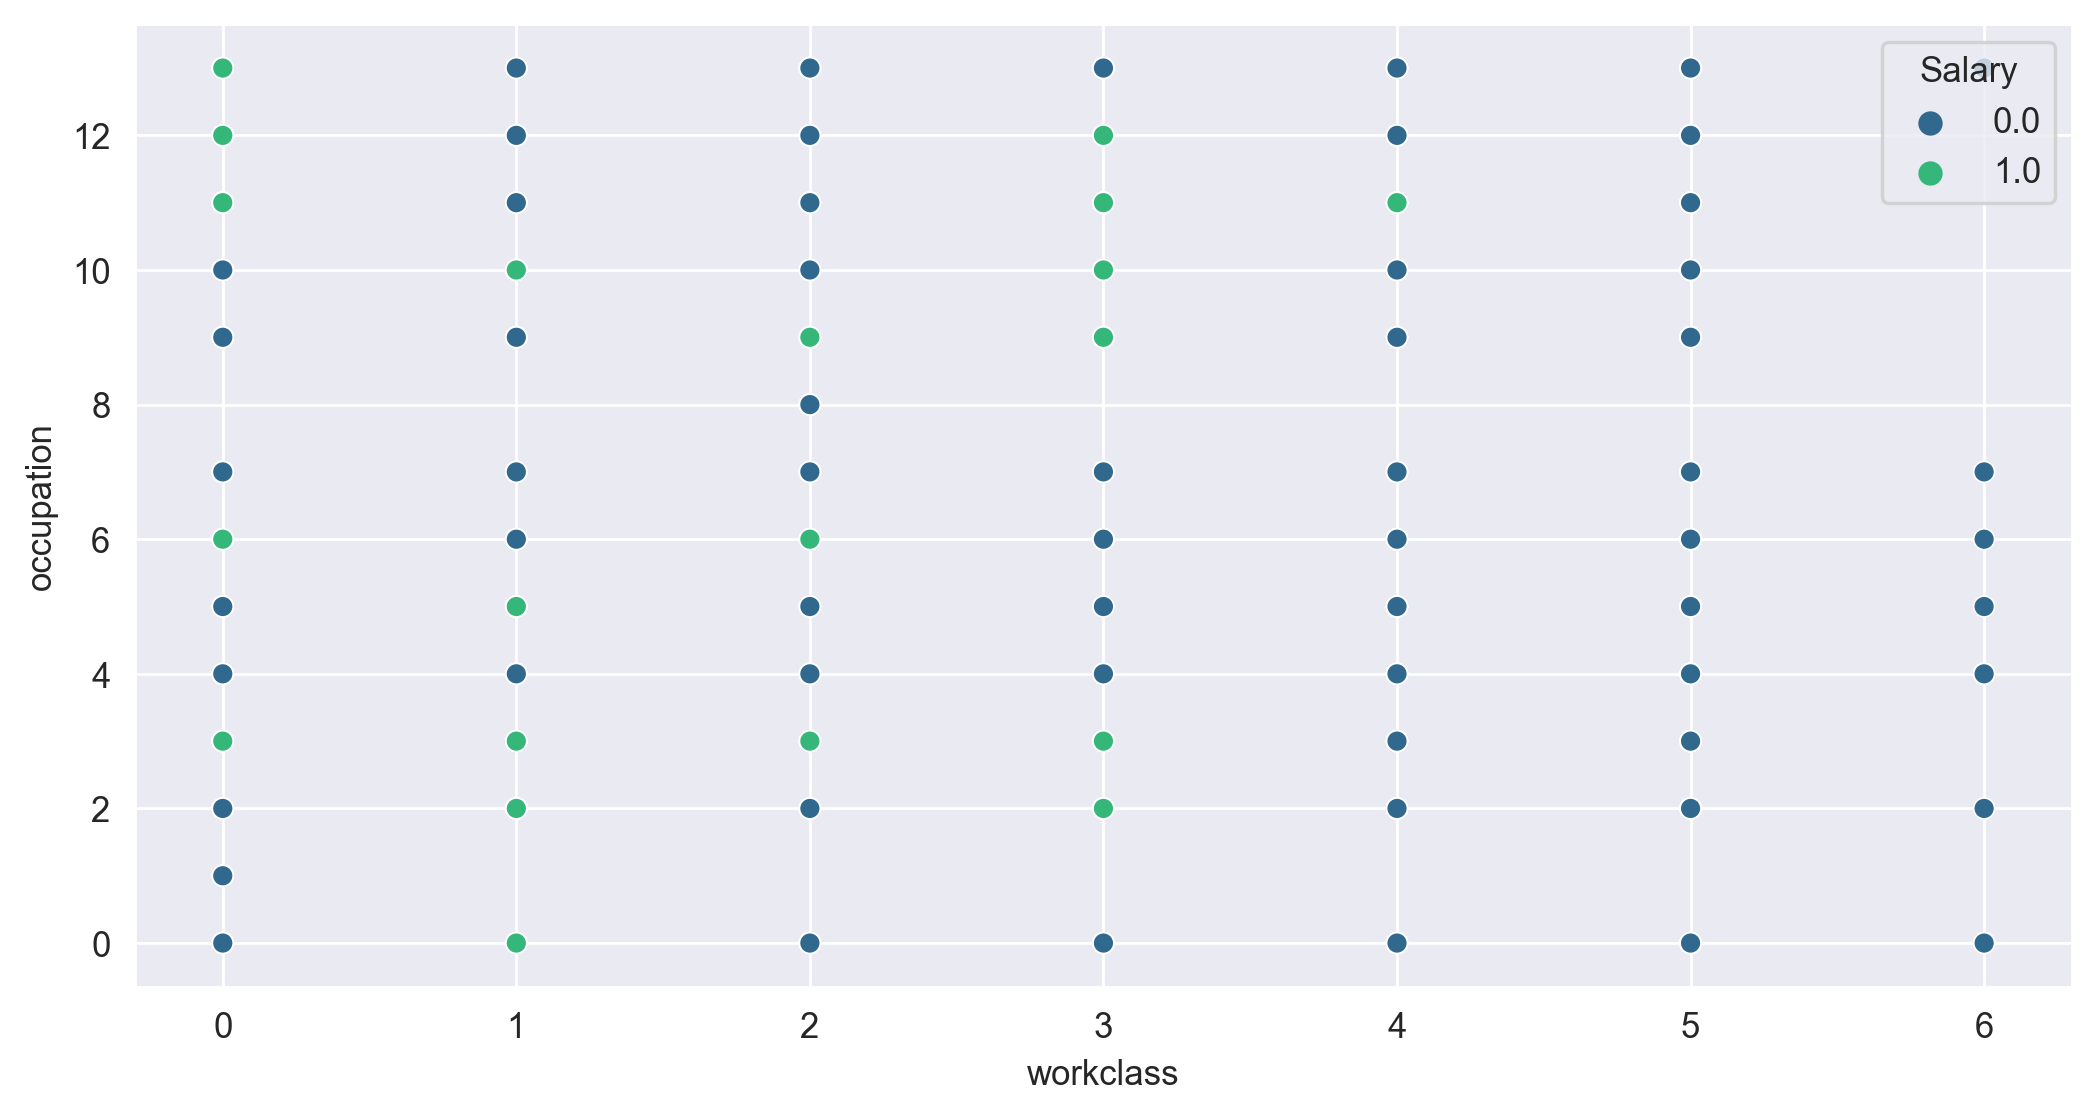

In [31]:
#2D scatterplot to understand the data.
sns.scatterplot(x= df_train['workclass'], y = df_train['occupation'], hue=df_train['Salary'], palette='viridis')

In [ ]:
#splitting the taining data into dependent and Independent column

In [22]:
x_df_train=df_train.iloc[:,:-1]
y_df_train=df_train['Salary']

In [ ]:
#splitting the testing data into dependent and Independent column

In [29]:
x_df_test=df_train.iloc[:,:-1]
y_df_test=df_train['Salary']

In [26]:
#Standardization
sc = StandardScaler()
x_df_train= sc.fit_transform(x_df_train)
x_df_train

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [30]:
#Standardization
sc = StandardScaler()
x_df_test= sc.fit_transform(x_df_test)
x_df_test

array([[ 0.04277892,  2.93594688, -0.34982703, ..., -0.21850808,
        -0.07773541,  0.26635842],
       [ 0.88026081,  1.88764517, -0.34982703, ..., -0.21850808,
        -2.33149486,  0.26635842],
       [-0.0333558 , -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       ...,
       [ 1.48933854, -0.20895825,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842],
       [-1.25151126, -0.20895825,  0.1748048 , ..., -0.21850808,
        -1.74718685,  0.26635842],
       [ 1.03253024,  0.83934346,  0.1748048 , ..., -0.21850808,
        -0.07773541,  0.26635842]])

In [33]:
svc = SVC()

svc.fit(x_df_train,y_df_train)
ypred = svc.predict(x_df_test)
print(svc.score(x_df_train,y_df_train))
print(svc.score(x_df_test,y_df_test))

0.8512648784854614
0.8512648784854614


In [ ]:
#With help of GrideSearchCV -> Kernel

In [35]:
param = {
    'kernel' : ['linear','rbf','poly']
}

In [46]:
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)
grid.fit(x_df_train,y_df_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [47]:
grid.best_params_

{'kernel': 'rbf'}

In [ ]:
#now implementing the model again with rbf

In [48]:
svc = SVC(kernel='rbf')

svc.fit(x_df_train,y_df_train)
ypred = svc.predict(x_df_test)
print(svc.score(x_df_train,y_df_train))
print(svc.score(x_df_test,y_df_test))

0.8512648784854614
0.8512648784854614


In [49]:

print(classification_report(ypred,y_df_test))

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91     24651
         1.0       0.57      0.77      0.66      5510

    accuracy                           0.85     30161
   macro avg       0.76      0.82      0.78     30161
weighted avg       0.88      0.85      0.86     30161

